In [189]:
# ABOUT DATASET
# Temperature:- Temperature in Kelvin
# Ro :- Radius of star wrt to the sun
# Lo:- Luminosity of the star relative to the sun
# Color :- Color of the star
# Spectral_Class:- An asteroid spectral type is assigned to asteroids based on their emission spectrum, color, and sometimes albedo. 
# These types are thought to correspond to an asteroid's surface composition.
#
# Type:
#
# Red Dwarf - 0 
# Brown Dwarf - 1 
# White Dwarf - 2 
# Main Sequence - 3 
# Super Giant - 4 
# Hyper Giant - 5

**IMPORTS**

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**LOADING DATA**

In [191]:
stars = pd.read_csv('/content/Stars.csv')
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


**DATA EXPLORATION**

In [192]:
# first 5 rows
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [193]:
# last 5 rows
stars.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [194]:
# datatypes
stars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [195]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [196]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [197]:
stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [198]:
# null values
stars.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [199]:
# duplicated values
stars.duplicated().sum()

0

In [200]:
# Red Dwarf - 0 
# Brown Dwarf - 1 
# White Dwarf - 2 
# Main Sequence - 3 
# Super Giant - 4 
# Hyper Giant - 5

star_types = {
    0: "Red Dwarf",
    1: "Brown Dwarf",
    2: "White Dwarf",
    3: "Main Sequence",
    4: "Super Giant",
    5: "Hyper Giant"
}

# change star types from integers to real types of stars
for index in tqdm(range(len(star_types.keys()))):
  stars["Type"] = stars["Type"].replace(index, star_types[index])

stars.head()

100%|██████████| 6/6 [00:00<00:00, 1003.22it/s]


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


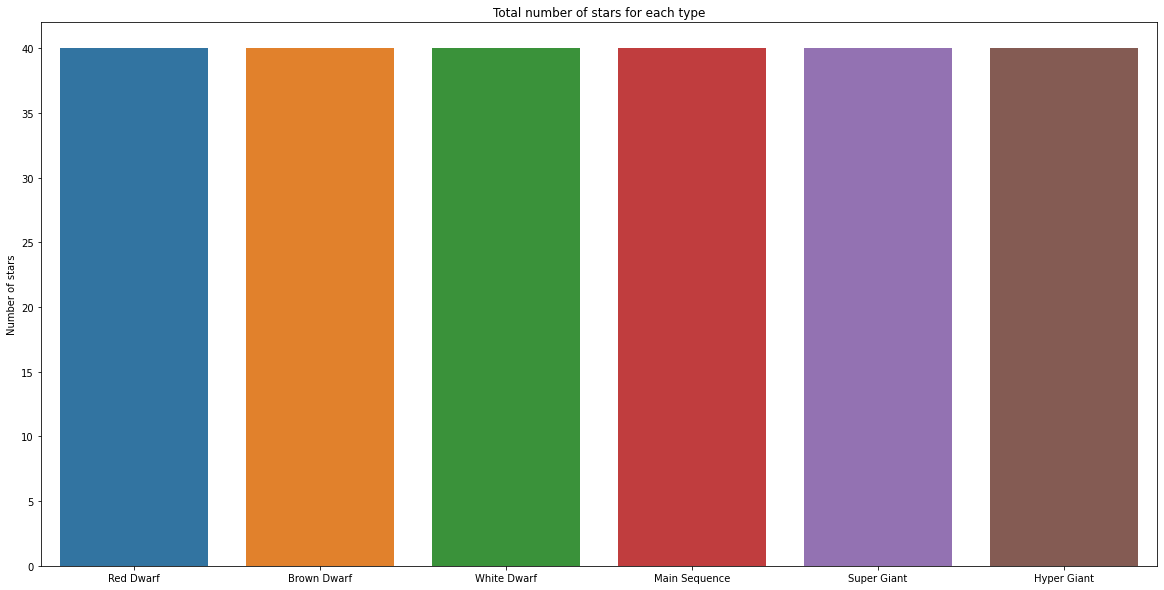

In [201]:
plt.figure(figsize=(20, 10))
plt.title("Total number of stars for each type")

sns.barplot(x=stars['Type'].unique(), y=stars['Type'].value_counts())

plt.ylabel("Number of stars")
plt.show()

# in the below chart, we can observe we have 40 records of each type of star

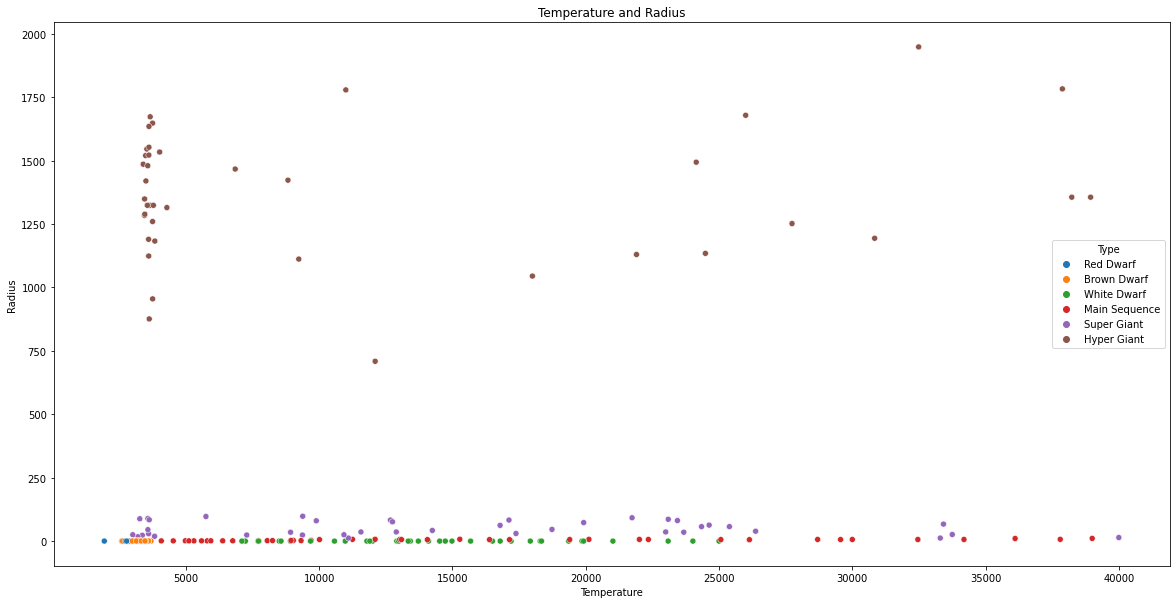

In [202]:
plt.figure(figsize=(20, 10))
plt.title("Temperature and Radius")

sns.scatterplot(x=stars['Temperature'], 
                y=stars['R'],
                hue=stars['Type'],
                data=stars)

plt.ylabel("Radius")
plt.show()

# here we can observe that "Hyper Giants" have a bigger radius than the other types 

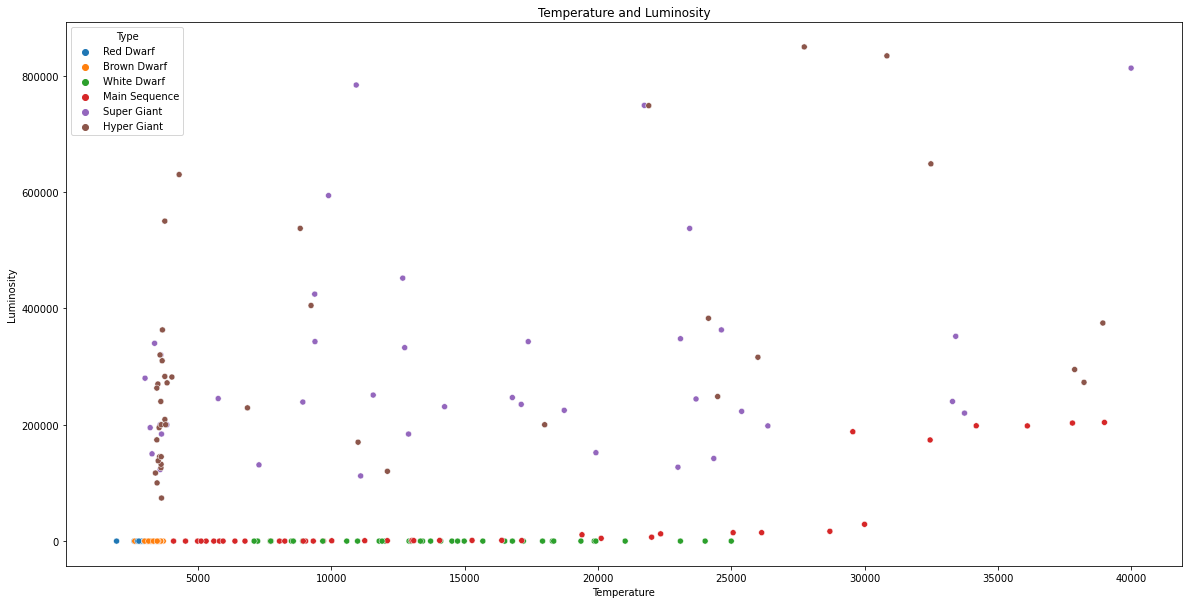

In [203]:
plt.figure(figsize=(20, 10))
plt.title("Temperature and Luminosity")

sns.scatterplot(x=stars['Temperature'], 
                y=stars['L'],
                hue=stars['Type'],
                data=stars)

plt.ylabel("Luminosity")
plt.show()

# So, "Hyper Giants" tend to be the most luminous ones, but "Super Giants" which are smaller are equally luminous
# There must be a relation between Luminosity and Radius, where "Super Giants" are an exception

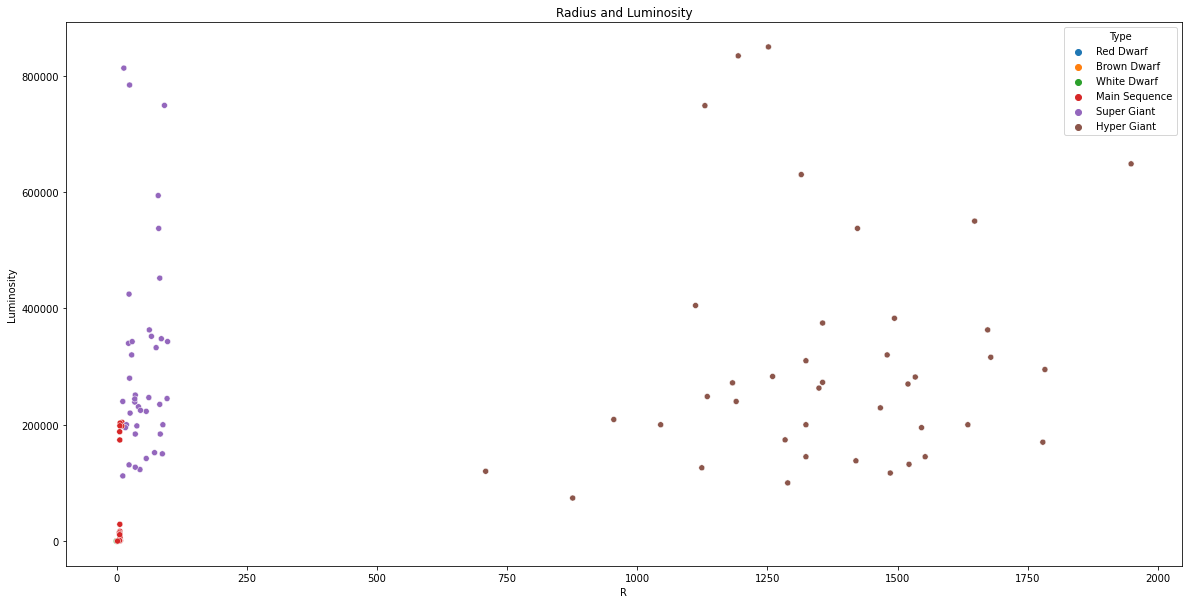

In [204]:
plt.figure(figsize=(20, 10))
plt.title("Radius and Luminosity")

sns.scatterplot(x=stars['R'], 
                y=stars['L'],
                hue=stars['Type'],
                data=stars)

plt.ylabel("Luminosity")
plt.show()

# we can observe that "Hyper Giants" are the biggest and brightest, followed by "Super Giants"

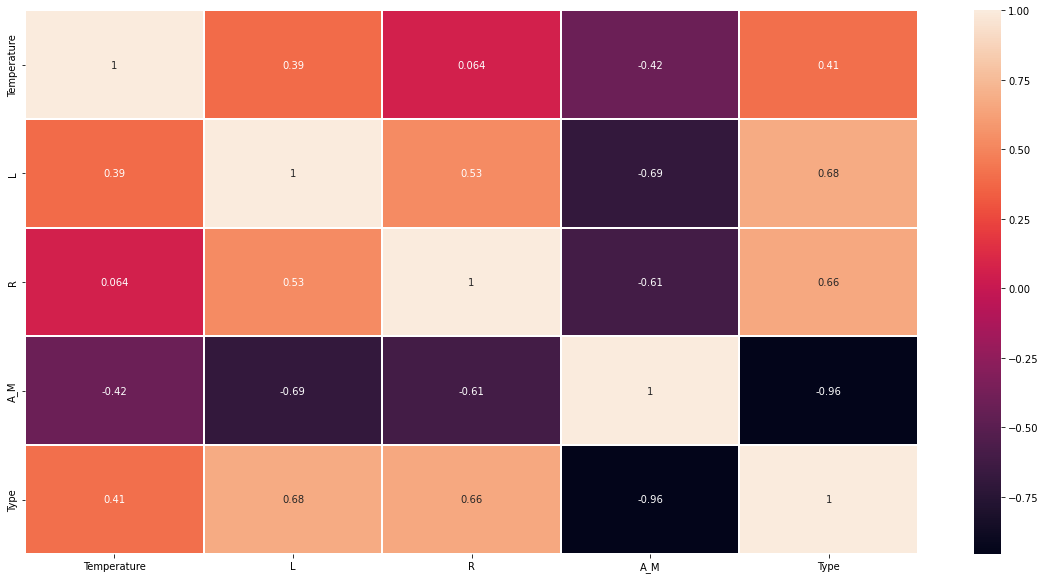

In [205]:
# get dataset without the replaced Star Types
stars_types_not_replaced = pd.read_csv('/content/Stars.csv')

plt.figure(figsize=(20, 10))

sns.heatmap(stars_types_not_replaced.corr(), annot=True, linewidths=1)
plt.show()

# here we can observe a correlation between the Star Type and the Absolute Magnitude

**GET VALUES FOR KEYBOARD INPUT**

In [206]:
# get rows to test
nr_test_values = 5

test_values = stars.sample(nr_test_values)
test_values

,Temperature,L,R,A_M,Color,Spectral_Class,Type
147,14732,0.00011,0.00892,12.89,white,F,White Dwarf
62,2983,0.00024,0.09400,16.09,Red,M,Red Dwarf
50,3490,270000.00000,1520.00000,-9.40,Red,M,Hyper Giant
105,14245,231000.00000,42.00000,-6.12,Blue,O,Super Giant
120,3323,0.00043,0.09120,17.16,Red,M,Red Dwarf


In [207]:
test_values_X = test_values.drop(["Type", "Color", "Spectral_Class"], axis=1)
test_values_X

,Temperature,L,R,A_M
147,14732,0.00011,0.00892,12.89
62,2983,0.00024,0.09400,16.09
50,3490,270000.00000,1520.00000,-9.40
105,14245,231000.00000,42.00000,-6.12
120,3323,0.00043,0.09120,17.16


In [208]:
test_values_y = test_values["Type"]
test_values_y

147    White Dwarf
62       Red Dwarf
50     Hyper Giant
105    Super Giant
120      Red Dwarf
Name: Type, dtype: object

In [209]:
# drop rows that will be used for test
for index in test_values.index:
  stars = stars.drop(index)

**PREDICT & CHECK SCORE**

In [210]:
features = stars.drop(["Type", "Color", "Spectral_Class"], axis=1)
target = stars["Type"]

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [213]:
clf = DecisionTreeClassifier(max_depth = 50)
clf = clf.fit(X_train, y_train)

In [214]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [215]:
predictions = clf.predict(X_test)
predictions

array(['Brown Dwarf', 'Main Sequence', 'Red Dwarf', 'Red Dwarf',
       'Brown Dwarf', 'Hyper Giant', 'White Dwarf', 'Main Sequence',
       'Super Giant', 'Brown Dwarf', 'Hyper Giant', 'Hyper Giant',
       'Hyper Giant', 'Super Giant', 'White Dwarf', 'Main Sequence',
       'Brown Dwarf', 'Hyper Giant', 'Hyper Giant', 'White Dwarf',
       'Main Sequence', 'Brown Dwarf', 'Main Sequence', 'White Dwarf',
       'Super Giant', 'White Dwarf', 'White Dwarf', 'Red Dwarf',
       'White Dwarf', 'Brown Dwarf', 'Main Sequence', 'Red Dwarf',
       'Super Giant', 'White Dwarf', 'Red Dwarf', 'Hyper Giant',
       'Super Giant', 'Brown Dwarf', 'Super Giant', 'Red Dwarf',
       'Super Giant', 'White Dwarf', 'Red Dwarf', 'Red Dwarf',
       'White Dwarf', 'Hyper Giant', 'White Dwarf', 'Red Dwarf',
       'Super Giant', 'Main Sequence', 'Super Giant', 'Hyper Giant',
       'Super Giant', 'Super Giant', 'Hyper Giant', 'Super Giant',
       'Hyper Giant', 'Brown Dwarf', 'Main Sequence', 'Super Giant

In [216]:
accuracy_score(y_test, predictions)

0.9787234042553191

**SIMULATE KEYBOARD INPUT**

In [237]:
# predict on selected values for test
test_predictions = clf.predict(test_values_X)
test_predictions

array(['White Dwarf', 'Red Dwarf', 'Hyper Giant', 'Super Giant',
       'Red Dwarf'], dtype=object)

In [238]:
accuracy_score(test_values_y, test_predictions)

1.0

In [239]:
test_values_y

147    White Dwarf
62       Red Dwarf
50     Hyper Giant
105    Super Giant
120      Red Dwarf
Name: Type, dtype: object

**PRINT THE GENERATED DECISION TREE**

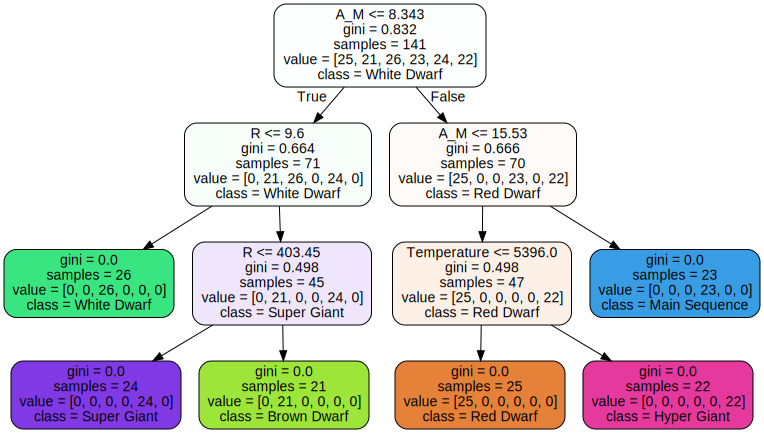

In [235]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "stars_tree.dot"),
        feature_names=["Temperature", "L", "R", "A_M"],
        class_names=stars["Type"].unique(),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "stars_tree.dot"))

**EXPORT MODEL**

In [236]:
from joblib import dump, load

dump(clf, 'Star_Classifier.joblib')
clf = load('Star_Classifier.joblib')